# Extract light curve

In [427]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [428]:
datadir = os.getcwd()

datadir = datadir + '/mast_files'

datafile4_lc = '/tess2018292075959-s0004-0000000270577175-0124-s/tess2018292075959-s0004-0000000270577175-0124-s_lc.fits'
datafile4_tp = '/tess2018292075959-s0004-0000000270577175-0124-s/tess2018292075959-s0004-0000000270577175-0124-s_tp.fits'

datafile5_lc = '/tess2018319095959-s0005-0000000270577175-0125-s/tess2018319095959-s0005-0000000270577175-0125-s_lc.fits'
datafile5_tp = '/tess2018319095959-s0005-0000000270577175-0125-s/tess2018319095959-s0005-0000000270577175-0125-s_tp.fits'

datafile6_lc = '/tess2018349182459-s0006-0000000270577175-0126-s/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits'
datafile6_tp = '/tess2018349182459-s0006-0000000270577175-0126-s/tess2018349182459-s0006-0000000270577175-0126-s_tp.fits'

datafile7_lc = '/tess2019006130736-s0007-0000000270577175-0131-s/tess2019006130736-s0007-0000000270577175-0131-s_lc.fits'
datafile7_tp = '/tess2019006130736-s0007-0000000270577175-0131-s/tess2019006130736-s0007-0000000270577175-0131-s_tp.fits'

In [430]:
data4 = fits.getdata(datadir + datafile4_lc)
data5 = fits.getdata(datadir + datafile5_lc)
data6 = fits.getdata(datadir + datafile6_lc)
data7 = fits.getdata(datadir + datafile7_lc)

# Let's do some work on the light curves:
- remove nans in TIME and PDCSAP_FLUX
- remove non-zero quality flags
- remove event 1421 and 1424 in the first sector (sector 4) 

In [349]:
def remove_nans_quality(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

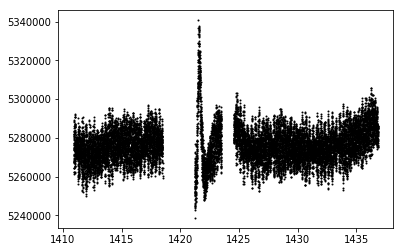

In [350]:
t4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[0]
f4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[1]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

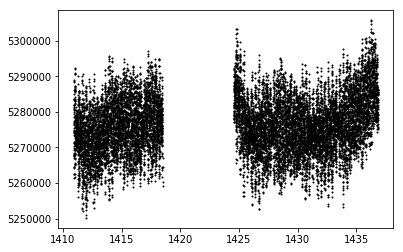

In [351]:
#remove instrumental thingy
mask_instrumental = (1421 < t4) & (t4 < 1424)

t4 = t4[~mask_instrumental]
f4 = f4[~mask_instrumental]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

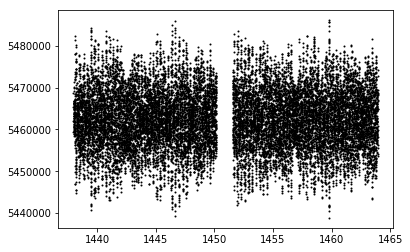

In [352]:
t5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[0]
f5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[1]

plt.scatter(t5, f5, s=1, c='k')
plt.show()

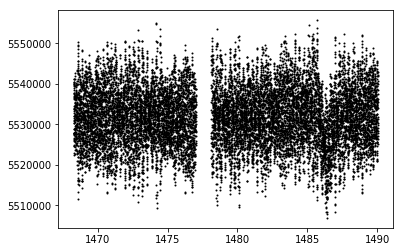

In [353]:
t6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

plt.scatter(t6, f6, s=1, c='k')
plt.show()

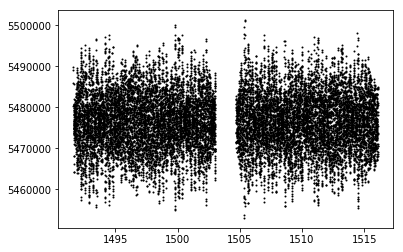

In [354]:
t7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

plt.scatter(t7, f7, s=1, c='k')
plt.show()

In [355]:
def div_median(flux):
    return flux / np.median(flux)

In [356]:
def comb(arr1, arr2, arr3, arr4):
    tmp1 = arr1.tolist()
    tmp2 = arr2.tolist()
    tmp3 = arr3.tolist()
    tmp4 = arr4.tolist()
    return tmp1 + tmp2 + tmp3 + tmp4

In [357]:
t = comb(t4, t5, t6, t7)
f = comb(div_median(f4), div_median(f5), div_median(f6), div_median(f7))

In [358]:
len(t)

62976

In [359]:
#The sectors 4 - 7 started approx. at the following BTJD time:
sectors = [1410.9, 1437.8, 1465.2, 1491.6]

<Figure size 432x288 with 0 Axes>

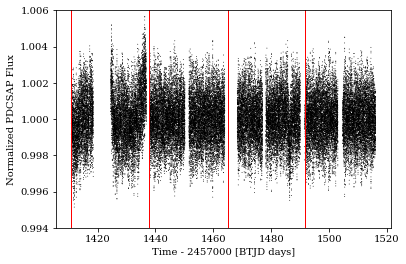

In [369]:
plt.rc('font', family='serif')
plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t, f, s=0.75, c='k', edgecolor = '')

ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]

plt.show()

fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

# Additionally to the previous modifications, we want to remove 10 min before and after an momentum dump

In [377]:
def remove_nans_quality_md(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    
    mask_q = (quality == 32) | (quality == 128)
    
    ten_min = 10/1440


    mask_list= [np.logical_and(time>time[i]-ten_min, time<time[i]+ten_min) for i in np.where(mask_q)[0]]
    mask_md = np.logical_not(np.any(np.array(mask_list),axis=0))
    
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality & mask_md
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


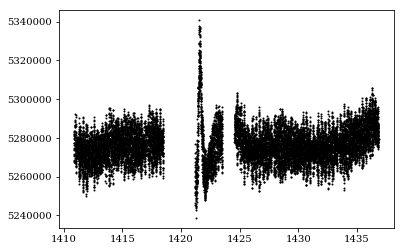

In [378]:
t4 = remove_nans_quality_md(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[0]
f4 = remove_nans_quality_md(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[1]

plt.scatter(t4, f4, s=1, c='k')

plt.show()

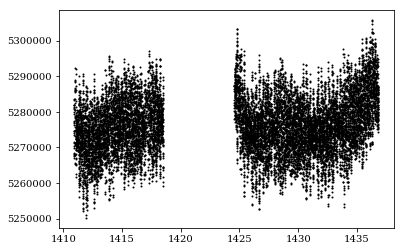

In [379]:
#remove instrumental thingy
mask_instrumental = (1421 < t4) & (t4 < 1424)

t4 = t4[~mask_instrumental]
f4 = f4[~mask_instrumental]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


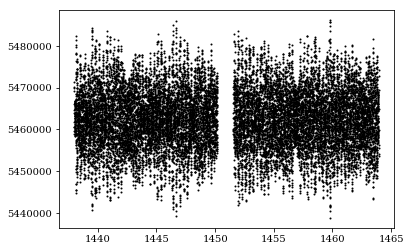

In [380]:
t5 = remove_nans_quality_md(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[0]
f5 = remove_nans_quality_md(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[1]

plt.scatter(t5, f5, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


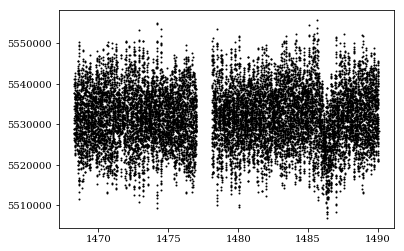

In [381]:
t6 = remove_nans_quality_md(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality_md(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

plt.scatter(t6, f6, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


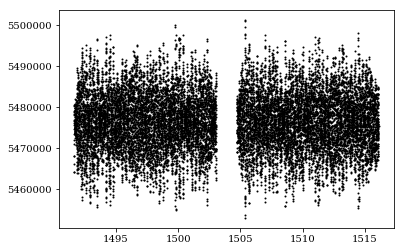

In [382]:
t7 = remove_nans_quality_md(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7 = remove_nans_quality_md(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

plt.scatter(t7, f7, s=1, c='k')
plt.show()

In [383]:
t = comb(t4, t5, t6, t7)
f = comb(div_median(f4), div_median(f5), div_median(f6), div_median(f7))

In [384]:
len(t)

62454

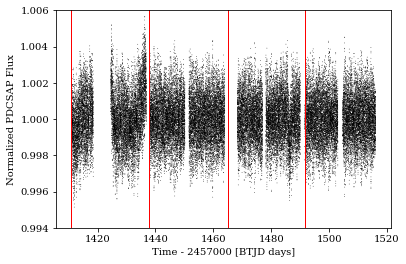

In [385]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t, f, s=0.5, c='k', edgecolor = '')

ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]

plt.show()

#fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

In [371]:
datapairs=np.stack((t, -2.5*np.log10(f)), axis=-1)
np.savetxt('betaPic_mag.txt',datapairs)

(-0.01, 0.01)

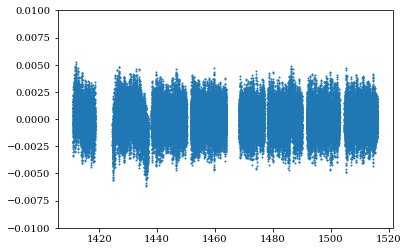

In [386]:
plt.scatter(t, -2.5*np.log10(f), s=1)
plt.ylim(-0.01, 0.01)

# For the frequency analysis we remove the 3 dimming events and the measurements done one hour earlier and later. We also remove the complete first sector (Sector 4)

In [402]:
# dimming times:
# -1 hour if start
# +1 hour if end

hour = 1/24

s1 = 1442.1 - hour
e1 = 1442.7 + hour
s2 = 1458.7 - hour
e2 = 1459.8 + hour
s3 = 1485.7 - hour
e3 = 1488.3 + hour

In [403]:
t = np.array(t)
f = np.array(f)

In [431]:
time_mask1 = (s1 < t) & (t < e1)
time_mask2 = (s2 < t) & (t < e2)
time_mask3 = (s3 < t) & (t < e3)

time_maskS4 = t < 1437.8

In [432]:
time_mask = ~time_mask1 & ~time_mask2 & ~time_mask3 & ~time_maskS4

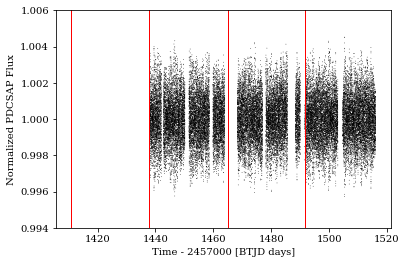

In [433]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t[time_mask], f[time_mask], s=0.5, c='k', edgecolor = '')

#ax.set_xlim(1430, 1440)
ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]



plt.show()

#fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

In [434]:
datapairs=np.stack((t[time_mask], -2.5*np.log10(f[time_mask])), axis=-1)
np.savetxt('betaPic_mag.txt',datapairs)

(-0.01, 0.01)

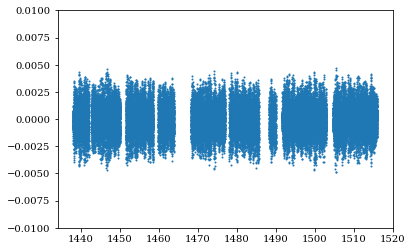

In [435]:
plt.scatter(t[time_mask], -2.5*np.log10(f[time_mask]), s=1)
plt.ylim(-0.01, 0.01)